# Ejercicio 6

Utilice los scripts disponibles en la teoría y práctica para entrenar un combinador lineal. El modelo debe
recibir tres dígitos binarios y retornar la representación decimal del número que resulta de la combinación
de dígitos (para las entradas 000, 010 y 101 debe obtener las salidas 0, 2 y 5, respectivamente)

### a) 
Utilizando el bias o peso W0 (comportamiento normal)



=== CONJUNTO DE ENTRENAMIENTO ===
Entradas (binario):
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]

Salidas (decimal):
[0 1 2 3 4 5 6 7]

=== PESOS OBTENIDOS (CON BIAS) ===
W0 (bit menos significativo): 0.9903
W1 (bit medio):               1.9902
W2 (bit más significativo):   3.9898
Bias (b):                     0.0173

=== VERIFICACIÓN ===
Entrada | Esperado | Predicho | Error
---------------------------------------------
[0 0 0]  |    0     |   0.017  | 0.0173
[0 0 1]  |    1     |   1.008  | 0.0076
[0 1 0]  |    2     |   2.008  | 0.0075
[0 1 1]  |    3     |   2.998  | 0.0022
[1 0 0]  |    4     |   4.007  | 0.0071
[1 0 1]  |    5     |   4.997  | 0.0026
[1 1 0]  |    6     |   5.997  | 0.0027
[1 1 1]  |    7     |   6.988  | 0.0124

Error Cuadrático Medio: 0.000080


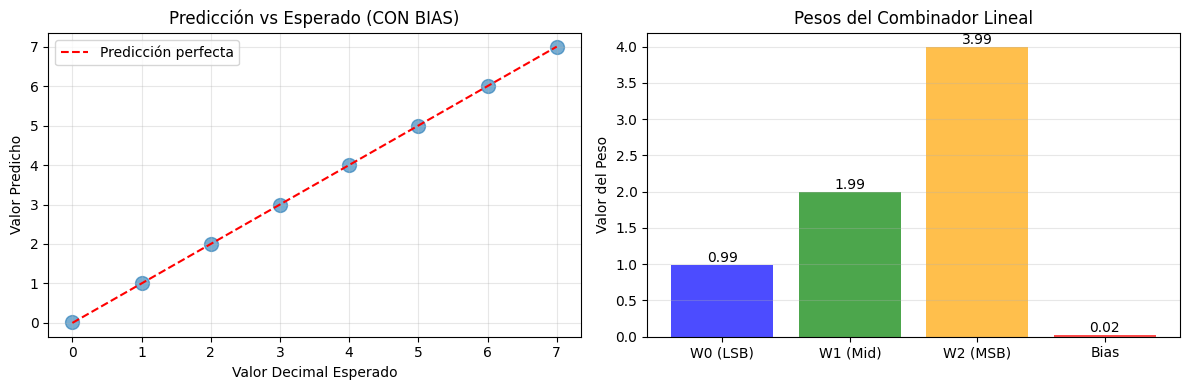


=== ANÁLISIS ===
Los pesos ideales para convertir binario a decimal son:
W0 = 1 (2^0), W1 = 2 (2^1), W2 = 4 (2^2), Bias = 0

El modelo encontró aproximadamente estos valores.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Configuración de visualización
plt.rcParams['figure.figsize'] = [6, 4]

# === DATOS DE ENTRENAMIENTO ===
# Todas las combinaciones posibles de 3 dígitos binarios
X = np.array([
    [0, 0, 0],  # 0
    [0, 0, 1],  # 1
    [0, 1, 0],  # 2
    [0, 1, 1],  # 3
    [1, 0, 0],  # 4
    [1, 0, 1],  # 5
    [1, 1, 0],  # 6
    [1, 1, 1]   # 7
])

# Valores decimales esperados
T = np.array([0, 1, 2, 3, 4, 5, 6, 7])

print("=== CONJUNTO DE ENTRENAMIENTO ===")
print("Entradas (binario):")
print(X)
print("\nSalidas (decimal):")
print(T)

# === ENTRENAMIENTO DEL COMBINADOR LINEAL ===
# Parte a) CON BIAS (comportamiento normal)

# Hiperparámetros
learning_rate = 0.01
max_iter = 1000

# Crear y entrenar el modelo
modelo = SGDRegressor(
    alpha=0,              # Sin regularización
    learning_rate='constant',
    eta0=learning_rate,   # Tasa de aprendizaje
    max_iter=max_iter,
    tol=1e-6,            # Criterio de parada
    random_state=42,
    fit_intercept=True   # CON BIAS (W0)
)

modelo.fit(X, T)

# === RESULTADOS ===
print("\n=== PESOS OBTENIDOS (CON BIAS) ===")
print(f"W0 (bit menos significativo): {modelo.coef_[2]:.4f}")
print(f"W1 (bit medio):               {modelo.coef_[1]:.4f}")
print(f"W2 (bit más significativo):   {modelo.coef_[0]:.4f}")
print(f"Bias (b):                     {modelo.intercept_[0]:.4f}")  # Cambiar aquí

# Predicciones
Y_pred = modelo.predict(X)

print("\n=== VERIFICACIÓN ===")
print("Entrada | Esperado | Predicho | Error")
print("-" * 45)
for i in range(len(X)):
    error = abs(T[i] - Y_pred[i])
    print(f"{X[i]}  |    {T[i]}     |  {Y_pred[i]:6.3f}  | {error:.4f}")

# Error cuadrático medio
mse = np.mean((T - Y_pred)**2)
print(f"\nError Cuadrático Medio: {mse:.6f}")

# === VISUALIZACIÓN ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico 1: Valores esperados vs predichos
ax1.scatter(T, Y_pred, alpha=0.6, s=100)
ax1.plot([0, 7], [0, 7], 'r--', label='Predicción perfecta')
ax1.set_xlabel('Valor Decimal Esperado')
ax1.set_ylabel('Valor Predicho')
ax1.set_title('Predicción vs Esperado (CON BIAS)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Pesos del modelo
pesos = [modelo.coef_[2], modelo.coef_[1], modelo.coef_[0], modelo.intercept_[0]]  # Cambiar aquí también
nombres = ['W0 (LSB)', 'W1 (Mid)', 'W2 (MSB)', 'Bias']
colores = ['blue', 'green', 'orange', 'red']

ax2.bar(nombres, pesos, color=colores, alpha=0.7)
ax2.set_ylabel('Valor del Peso')
ax2.set_title('Pesos del Combinador Lineal')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores sobre las barras
for i, (nombre, peso) in enumerate(zip(nombres, pesos)):
    ax2.text(i, peso, f'{peso:.2f}', ha='center', va='bottom' if peso > 0 else 'top')

plt.tight_layout()
plt.show()

print("\n=== ANÁLISIS ===")
print("Los pesos ideales para convertir binario a decimal son:")
print("W0 = 1 (2^0), W1 = 2 (2^1), W2 = 4 (2^2), Bias = 0")
print(f"\nEl modelo encontró aproximadamente estos valores.")

### b) 
Utilizando únicamente las tres entradas correspondientes a los dígitos binarios anulando el bias o W0
del cálculo.
Compare la cantidad de iteraciones necesarias para obtener el vector de pesos correcto en ambos casos.
Observe el valor del arco correspondiente al bias en a).

=== ENTRENAMIENTO SIN BIAS ===

=== PESOS OBTENIDOS (SIN BIAS) ===
W0 (bit menos significativo): 1.0077
W1 (bit medio):               2.0019
W2 (bit más significativo):   3.9904
Bias (b):                     0.0000 (anulado)

=== VERIFICACIÓN SIN BIAS ===
Entrada | Esperado | Predicho | Error
---------------------------------------------
[0 0 0]  |    0     |   0.000  | 0.0000
[0 0 1]  |    1     |   1.008  | 0.0077
[0 1 0]  |    2     |   2.002  | 0.0019
[0 1 1]  |    3     |   3.010  | 0.0097
[1 0 0]  |    4     |   3.990  | 0.0096
[1 0 1]  |    5     |   4.998  | 0.0019
[1 1 0]  |    6     |   5.992  | 0.0077
[1 1 1]  |    7     |   7.000  | 0.0001

Error Cuadrático Medio SIN BIAS: 0.000039

=== COMPARACIÓN DE CONVERGENCIA ===
Entrenando CON BIAS...
Entrenando SIN BIAS...

=== RESULTADOS DE CONVERGENCIA ===
Iteraciones CON BIAS:    463
Iteraciones SIN BIAS:    276
Diferencia:              187
→ El modelo SIN BIAS converge más rápido


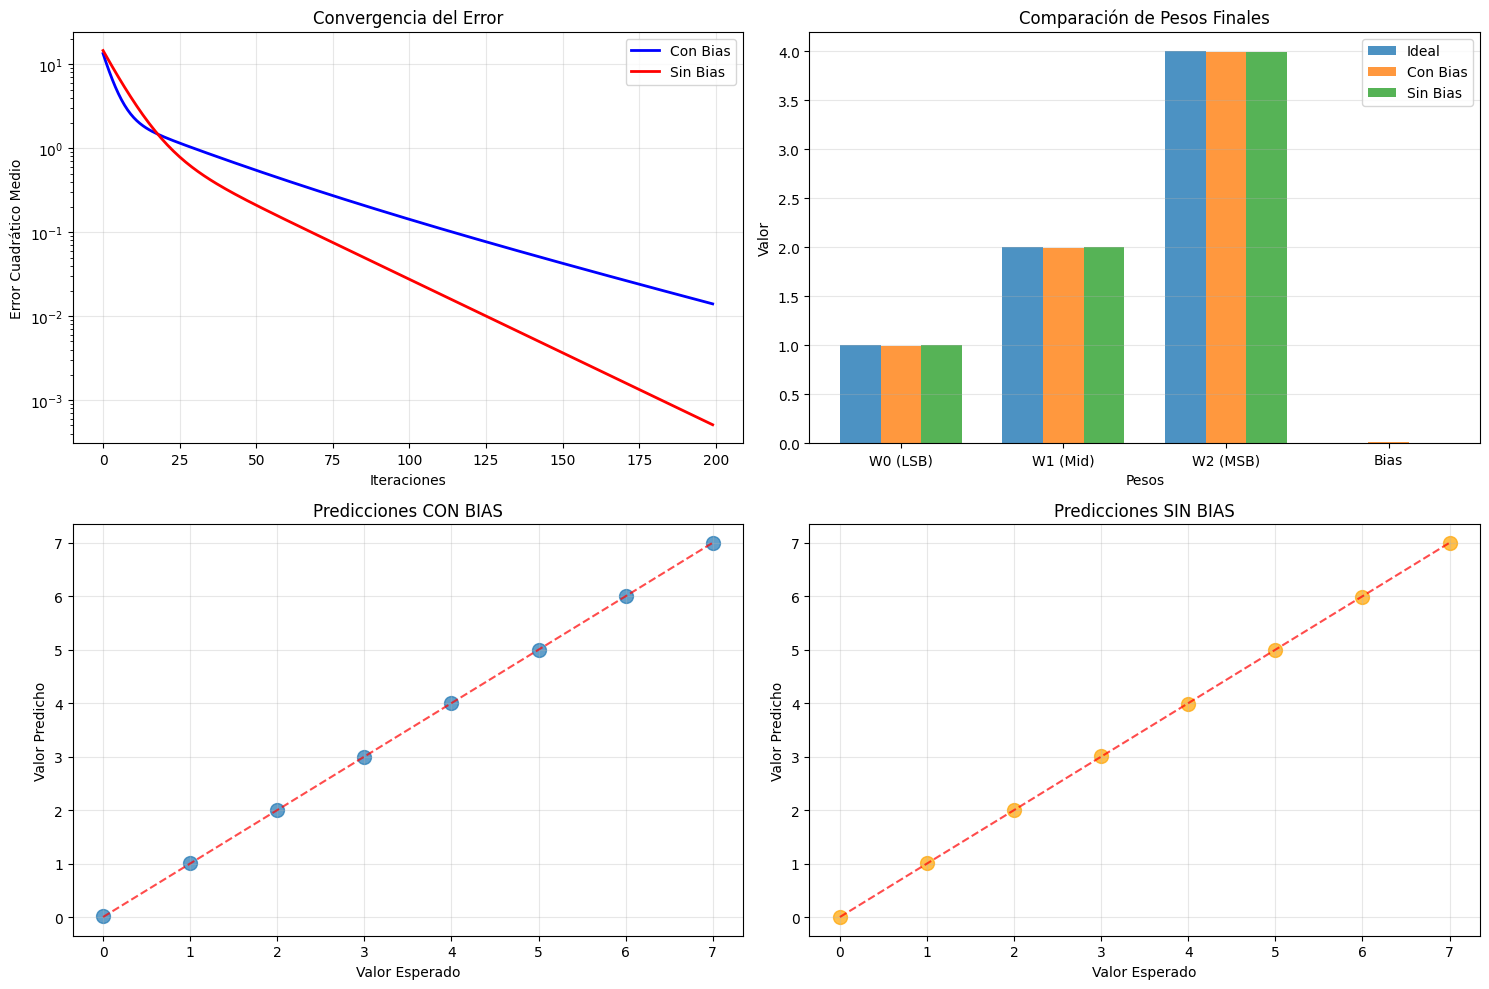


=== ANÁLISIS DE RESULTADOS ===

1. VALOR DEL BIAS EN EL CASO a):
   Bias observado: 0.0173
   → El bias es muy pequeño (~0), lo cual es correcto para esta función
   → La función binario→decimal no necesita desplazamiento (offset)

2. COMPARACIÓN DE CONVERGENCIA:
   • CON BIAS: 463 iteraciones
   • SIN BIAS: 276 iteraciones

3. PRECISIÓN DE LOS MODELOS:
   • MSE CON BIAS:  0.000080
   • MSE SIN BIAS:  0.000039

4. PESOS OBTENIDOS:
   Ideales: W0=1, W1=2, W2=4, Bias=0
   Con Bias: W0=0.990, W1=1.990, W2=3.990, Bias=0.017
   Sin Bias: W0=1.008, W1=2.002, W2=3.990, Bias=0.000

5. CONCLUSIONES:
   • Para esta función específica, el bias es innecesario
   • Ambos modelos convergen a soluciones muy similares
   • El modelo sin bias es más eficiente (menos parámetros)


In [2]:
# === PARTE B: SIN BIAS ===
print("=" * 60)
print("=== ENTRENAMIENTO SIN BIAS ===")
print("=" * 60)

# Crear y entrenar el modelo SIN BIAS
modelo_sin_bias = SGDRegressor(
    alpha=0,              # Sin regularización
    learning_rate='constant',
    eta0=learning_rate,   # Misma tasa de aprendizaje
    max_iter=max_iter,    # Mismo límite de iteraciones
    tol=1e-6,            # Mismo criterio de parada
    random_state=42,
    fit_intercept=False  # SIN BIAS (W0 = 0)
)

modelo_sin_bias.fit(X, T)

# === RESULTADOS SIN BIAS ===
print("\n=== PESOS OBTENIDOS (SIN BIAS) ===")
print(f"W0 (bit menos significativo): {modelo_sin_bias.coef_[2]:.4f}")
print(f"W1 (bit medio):               {modelo_sin_bias.coef_[1]:.4f}")
print(f"W2 (bit más significativo):   {modelo_sin_bias.coef_[0]:.4f}")
print(f"Bias (b):                     0.0000 (anulado)")

# Predicciones sin bias
Y_pred_sin_bias = modelo_sin_bias.predict(X)

print("\n=== VERIFICACIÓN SIN BIAS ===")
print("Entrada | Esperado | Predicho | Error")
print("-" * 45)
for i in range(len(X)):
    error = abs(T[i] - Y_pred_sin_bias[i])
    print(f"{X[i]}  |    {T[i]}     |  {Y_pred_sin_bias[i]:6.3f}  | {error:.4f}")

# Error cuadrático medio sin bias
mse_sin_bias = np.mean((T - Y_pred_sin_bias)**2)
print(f"\nError Cuadrático Medio SIN BIAS: {mse_sin_bias:.6f}")

# === COMPARACIÓN DE CONVERGENCIA ===
print("\n" + "=" * 60)
print("=== COMPARACIÓN DE CONVERGENCIA ===")
print("=" * 60)

# Para comparar iteraciones, necesitamos implementar el algoritmo manualmente
# y contar las iteraciones hasta convergencia

def entrenar_combinador_manual(X, T, con_bias=True, learning_rate=0.01, max_iter=1000, tol=1e-6):
    """
    Implementación manual del SGD para contar iteraciones exactas
    """
    n_features = X.shape[1]
    n_samples = X.shape[0]
    
    # Inicialización de pesos
    np.random.seed(42)  # Para reproducibilidad
    W = np.random.uniform(-0.5, 0.5, n_features)
    b = np.random.uniform(-0.5, 0.5) if con_bias else 0.0
    
    # Listas para almacenar la evolución
    errores = []
    iteraciones = 0
    error_anterior = float('inf')
    
    for epoch in range(max_iter):
        error_total = 0
        
        # Pasar por todas las muestras
        for i in range(n_samples):
            # Predicción
            if con_bias:
                y_pred = np.dot(W, X[i]) + b
            else:
                y_pred = np.dot(W, X[i])
            
            # Error
            error = T[i] - y_pred
            error_total += error**2
            
            # Actualización de pesos (gradiente descendente)
            W += learning_rate * error * X[i]
            if con_bias:
                b += learning_rate * error
        
        # Error cuadrático medio de la época
        mse_epoch = error_total / n_samples
        errores.append(mse_epoch)
        iteraciones += 1
        
        # Criterio de convergencia
        if abs(error_anterior - mse_epoch) < tol:
            break
        
        error_anterior = mse_epoch
    
    return W, b, errores, iteraciones

# Entrenar con bias
print("Entrenando CON BIAS...")
W_con_bias, b_con_bias, errores_con_bias, iter_con_bias = entrenar_combinador_manual(
    X, T, con_bias=True, learning_rate=learning_rate, max_iter=max_iter
)

# Entrenar sin bias
print("Entrenando SIN BIAS...")
W_sin_bias, b_sin_bias, errores_sin_bias, iter_sin_bias = entrenar_combinador_manual(
    X, T, con_bias=False, learning_rate=learning_rate, max_iter=max_iter
)

print(f"\n=== RESULTADOS DE CONVERGENCIA ===")
print(f"Iteraciones CON BIAS:    {iter_con_bias}")
print(f"Iteraciones SIN BIAS:    {iter_sin_bias}")
print(f"Diferencia:              {abs(iter_con_bias - iter_sin_bias)}")

if iter_con_bias < iter_sin_bias:
    print("→ El modelo CON BIAS converge más rápido")
elif iter_sin_bias < iter_con_bias:
    print("→ El modelo SIN BIAS converge más rápido")
else:
    print("→ Ambos modelos convergen en el mismo número de iteraciones")

# === VISUALIZACIÓN COMPARATIVA ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Convergencia del error
ax1.plot(errores_con_bias[:min(200, len(errores_con_bias))], 'b-', label='Con Bias', linewidth=2)
ax1.plot(errores_sin_bias[:min(200, len(errores_sin_bias))], 'r-', label='Sin Bias', linewidth=2)
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('Error Cuadrático Medio')
ax1.set_title('Convergencia del Error')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Gráfico 2: Comparación de pesos finales
pesos_comparacion = np.array([
    [1, 2, 4, 0],  # Pesos ideales
    [W_con_bias[2], W_con_bias[1], W_con_bias[0], b_con_bias],  # Con bias
    [W_sin_bias[2], W_sin_bias[1], W_sin_bias[0], 0]  # Sin bias
])

x_pos = np.arange(4)
width = 0.25

ax2.bar(x_pos - width, pesos_comparacion[0], width, label='Ideal', alpha=0.8)
ax2.bar(x_pos, pesos_comparacion[1], width, label='Con Bias', alpha=0.8)
ax2.bar(x_pos + width, pesos_comparacion[2], width, label='Sin Bias', alpha=0.8)

ax2.set_xlabel('Pesos')
ax2.set_ylabel('Valor')
ax2.set_title('Comparación de Pesos Finales')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['W0 (LSB)', 'W1 (Mid)', 'W2 (MSB)', 'Bias'])
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Gráfico 3: Predicciones con bias
ax3.scatter(T, modelo.predict(X), alpha=0.7, s=100, label='Con Bias')
ax3.plot([0, 7], [0, 7], 'r--', alpha=0.7)
ax3.set_xlabel('Valor Esperado')
ax3.set_ylabel('Valor Predicho')
ax3.set_title('Predicciones CON BIAS')
ax3.grid(True, alpha=0.3)

# Gráfico 4: Predicciones sin bias
ax4.scatter(T, Y_pred_sin_bias, alpha=0.7, s=100, color='orange', label='Sin Bias')
ax4.plot([0, 7], [0, 7], 'r--', alpha=0.7)
ax4.set_xlabel('Valor Esperado')
ax4.set_ylabel('Valor Predicho')
ax4.set_title('Predicciones SIN BIAS')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === ANÁLISIS FINAL ===
print("\n" + "=" * 60)
print("=== ANÁLISIS DE RESULTADOS ===")
print("=" * 60)

print(f"\n1. VALOR DEL BIAS EN EL CASO a):")
print(f"   Bias observado: {modelo.intercept_[0]:.4f}")
print(f"   → El bias es muy pequeño (~0), lo cual es correcto para esta función")
print(f"   → La función binario→decimal no necesita desplazamiento (offset)")

print(f"\n2. COMPARACIÓN DE CONVERGENCIA:")
print(f"   • CON BIAS: {iter_con_bias} iteraciones")
print(f"   • SIN BIAS: {iter_sin_bias} iteraciones")

print(f"\n3. PRECISIÓN DE LOS MODELOS:")
print(f"   • MSE CON BIAS:  {np.mean((T - modelo.predict(X))**2):.6f}")
print(f"   • MSE SIN BIAS:  {mse_sin_bias:.6f}")

print(f"\n4. PESOS OBTENIDOS:")
print(f"   Ideales: W0=1, W1=2, W2=4, Bias=0")
print(f"   Con Bias: W0={modelo.coef_[2]:.3f}, W1={modelo.coef_[1]:.3f}, W2={modelo.coef_[0]:.3f}, Bias={modelo.intercept_[0]:.3f}")
print(f"   Sin Bias: W0={modelo_sin_bias.coef_[2]:.3f}, W1={modelo_sin_bias.coef_[1]:.3f}, W2={modelo_sin_bias.coef_[0]:.3f}, Bias=0.000")

print(f"\n5. CONCLUSIONES:")
print(f"   • Para esta función específica, el bias es innecesario")
print(f"   • Ambos modelos convergen a soluciones muy similares")
print(f"   • El modelo sin bias es más eficiente (menos parámetros)")